Employee Attrition and Factors

Dane: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors

Cel: zbadanie nastrojów wśród pracowników organizacji, w kontekście ich
możliwości awansu lub odejścia.

Stakeholder: dział HR potrzebuje insightów na temat pracowników, którzy odeszli z
firmy i ryzyka jakim obarczone są osoby, które przez dłuższy czas pozostają bez
awansu


Prywatne życie pracownika - kto odchodzi najczęściej, kto pozostaje bez awansu

Factores: wiek, płeć, stan cywilny, odległość pracy od domu, work_life_balance, wykształcenie

Podzielilabym pracownikow na grupy wiekowe i przeprowadzila analize w tym kierunku:

18 - 22 młodzi ludzie - single bez ukończonych pełnych studiów - poniżej magistra

22 - 30

30 - 40

40 - 50

50 - 60

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('HR_Analytics.csv.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.sort_values(by='Age')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,2,Female,33,3,1,Research Scientist,3,Single,1514,8018,1,Y,No,16,3,3,80,0,0,4,1,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10
879,60,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9


In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
cols = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [12]:
for i in cols:
    print(f'Liczba kategorii zmiennej {i}: \n {df[i].value_counts()}')

Liczba kategorii zmiennej Age: 
 Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Liczba kategorii zmiennej Attrition: 
 Attrition
No     1233
Yes     237
Name: count, dtype: int64
Liczba kategorii zmiennej BusinessTravel: 
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Liczba kategorii zmiennej DailyRate: 
 DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64
Liczba kategorii zmiennej Department: 
 Department
Research & Development    961
Sales    

In [13]:
df_attrition = df[df['Attrition'] == 'Yes']

In [14]:
df_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [15]:
for i in cols:
    print(f'Liczba kategorii zmiennej {i}: \n {df_attrition[i].value_counts()}')

Liczba kategorii zmiennej Age: 
 Age
31    18
29    18
28    14
33    12
26    12
32    11
35    10
34     9
30     9
24     7
21     6
44     6
37     6
19     6
41     6
25     6
20     6
39     6
36     6
40     5
50     5
22     5
58     5
23     4
46     4
18     4
56     3
55     3
27     3
52     3
47     3
48     2
45     2
42     2
38     2
51     2
49     2
43     2
53     2
Name: count, dtype: int64
Liczba kategorii zmiennej Attrition: 
 Attrition
Yes    237
Name: count, dtype: int64
Liczba kategorii zmiennej BusinessTravel: 
 BusinessTravel
Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: count, dtype: int64
Liczba kategorii zmiennej DailyRate: 
 DailyRate
1475    2
289     2
350     2
303     2
575     2
       ..
725     1
1146    1
1243    1
805     1
410     1
Name: count, Length: 219, dtype: int64
Liczba kategorii zmiennej Department: 
 Department
Research & Development    133
Sales                      92
Human Resources            12
N

In [39]:
bins = [18, 22, 30, 40, 50, 61]
df_total_result = df_attrition['Age'].count()
df_cat = pd.cut(df_attrition['Age'], bins=bins, right=False)
df_cat = (df_cat.value_counts()/df_total_result * 100).sort_index()
print(df_cat)
print(df_total_result)


0       [40, 50)
2       [30, 40)
14      [22, 30)
21      [30, 40)
24      [30, 40)
          ...   
1438    [22, 30)
1442    [22, 30)
1444    [50, 61)
1452    [50, 61)
1461    [50, 61)
Name: Age, Length: 237, dtype: category
Categories (5, interval[int64, left]): [[18, 22) < [22, 30) < [30, 40) < [40, 50) < [50, 61)]
237


<Axes: xlabel='Age'>

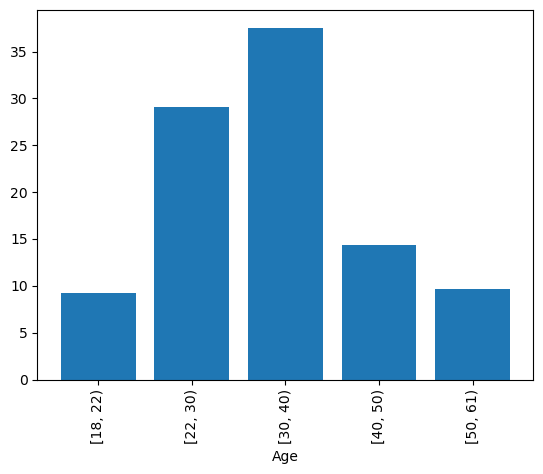

In [17]:
df_cat.plot.bar(width=0.8)

In [18]:
df_total = pd.cut(df['Age'], bins=bins, right=False)
df_total_result = df['Age'].count()
df_total = (df_total.value_counts()/df_total_result * 100).sort_index()
print(df_total)

Age
[18, 22)     2.789116
[22, 30)    19.387755
[30, 40)    42.312925
[40, 50)    23.741497
[50, 61)    11.768707
Name: count, dtype: float64


<Axes: xlabel='Age'>

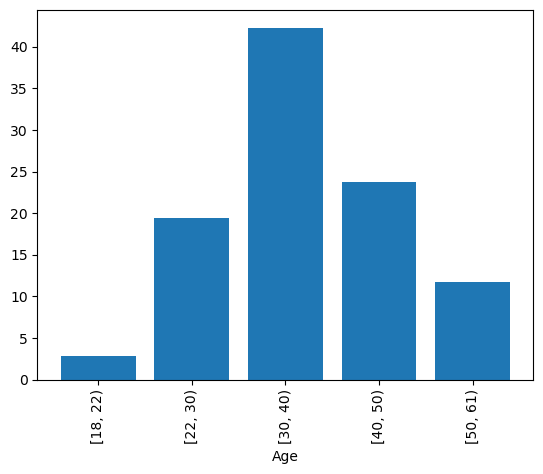

In [19]:
df_total.plot.bar(width=0.8)

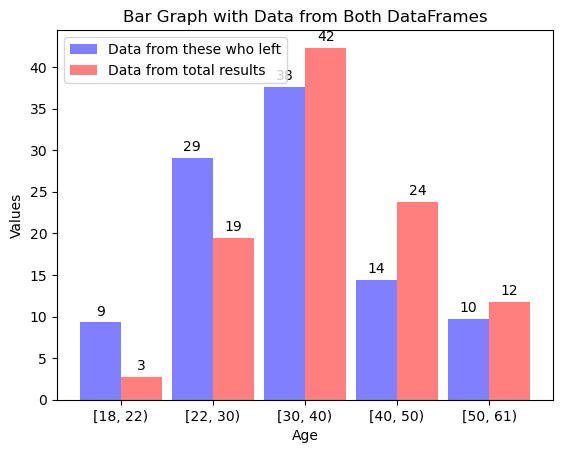

In [20]:
bins = ['[18, 22)', '[22, 30)', '[30, 40)', '[40, 50)', '[50, 61)']

indices = np.arange(len(bins))
bar_width = 0.45
# Plotting bar graph for DataFrame 1
bars1 = plt.bar(indices - bar_width/2, np.array(df_cat), color='blue', label='Data from these who left', alpha=0.5, width=bar_width)

# Plotting bar graph for DataFrame 2
bars2 = plt.bar(indices + bar_width/2, np.array(df_total), color='red', label='Data from total results', alpha=0.5, width=bar_width)

plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Bar Graph with Data from Both DataFrames')
plt.xticks(indices, bins)
plt.legend()

for bar in bars1:
    height = bar.get_height()
    plt.annotate('{}'.format(round(height)),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0,3),
                 textcoords="offset points",
                 ha='center', va='bottom')
    
for bar in bars2:
    height = bar.get_height()
    plt.annotate('{}'.format(round(height)),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0,3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

DailyRate
[102.0, 257.222)        10.884354
[257.222, 412.444)      10.340136
[412.444, 567.667)      11.700680
[567.667, 722.889)      12.789116
[722.889, 878.111)       9.523810
[878.111, 1033.333)     11.020408
[1033.333, 1188.556)    10.884354
[1188.556, 1343.778)    11.972789
[1343.778, 1499.0)      10.816327
Name: count, dtype: float64


<Axes: xlabel='DailyRate'>

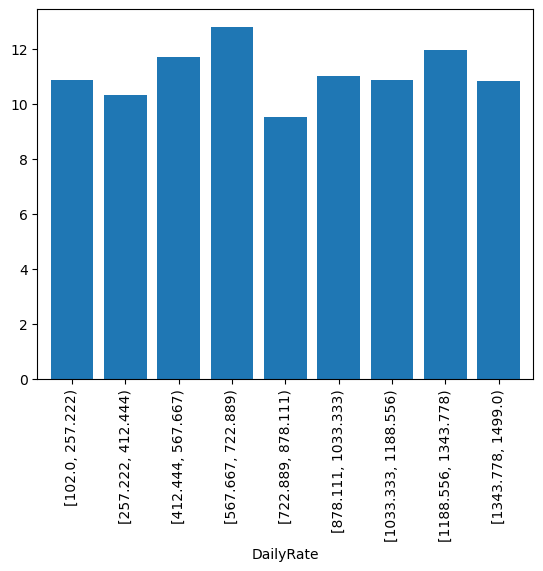

In [21]:
bins = np.linspace(df['DailyRate'].min(),df['DailyRate'].max(),10) 
df_total = pd.cut(df['DailyRate'], bins=bins, right=False)
df_total_result = df['DailyRate'].count()
df_total = (df_total.value_counts()/df_total_result * 100).sort_index()
print(df_total)
df_total.plot.bar(width=0.8)

Analiza

In [782]:
cols_personal = ['Age', 'Attrition', 'BusinessTravel', 
       'DistanceFromHome', 'Education', 'EmployeeCount', 'Gender', 
       'MaritalStatus', 'NumCompaniesWorked',
       'OverTime', 'TotalWorkingYears', 'WorkLifeBalance']

In [783]:
df_personal = df.copy()
cols_to_drop = [col for col in df_personal.columns if col not in cols_personal]
print(cols_to_drop)
df_personal.drop(columns=cols_to_drop, inplace=True)
df_personal.head(10)


['DailyRate', 'Department', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'Over18', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeCount,Gender,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,WorkLifeBalance
0,41,Yes,Travel_Rarely,1,2,1,Female,Single,8,Yes,8,1
1,49,No,Travel_Frequently,8,1,1,Male,Married,1,No,10,3
2,37,Yes,Travel_Rarely,2,2,1,Male,Single,6,Yes,7,3
3,33,No,Travel_Frequently,3,4,1,Female,Married,1,Yes,8,3
4,27,No,Travel_Rarely,2,1,1,Male,Married,9,No,6,3
5,32,No,Travel_Frequently,2,2,1,Male,Single,0,No,8,2
6,59,No,Travel_Rarely,3,3,1,Female,Married,4,Yes,12,2
7,30,No,Travel_Rarely,24,1,1,Male,Divorced,1,No,1,3
8,38,No,Travel_Frequently,23,3,1,Male,Single,0,No,10,3
9,36,No,Travel_Rarely,27,3,1,Male,Married,6,No,17,2


In [785]:
bins = [18, 22, 30, 40, 50, 61]

# Define the labels for the age categories
labels = ['18-21', '22-29', '30-39', '40-49', '50-60']

df_personal["AgeCategory"] = pd.cut(df_personal['Age'], bins=bins, labels=labels, right=False)
df_personal.head(10)


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeCount,Gender,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,WorkLifeBalance,AgeCategory
0,41,Yes,Travel_Rarely,1,2,1,Female,Single,8,Yes,8,1,40-49
1,49,No,Travel_Frequently,8,1,1,Male,Married,1,No,10,3,40-49
2,37,Yes,Travel_Rarely,2,2,1,Male,Single,6,Yes,7,3,30-39
3,33,No,Travel_Frequently,3,4,1,Female,Married,1,Yes,8,3,30-39
4,27,No,Travel_Rarely,2,1,1,Male,Married,9,No,6,3,22-29
5,32,No,Travel_Frequently,2,2,1,Male,Single,0,No,8,2,30-39
6,59,No,Travel_Rarely,3,3,1,Female,Married,4,Yes,12,2,50-60
7,30,No,Travel_Rarely,24,1,1,Male,Divorced,1,No,1,3,30-39
8,38,No,Travel_Frequently,23,3,1,Male,Single,0,No,10,3,30-39
9,36,No,Travel_Rarely,27,3,1,Male,Married,6,No,17,2,30-39


In [786]:
bins = [1, 10, 20, 30]

# Define the labels for the age categories
labels = ['1-9', '10-19', '20-29']
df_personal["DistanceCategory"] = pd.cut(df_personal['DistanceFromHome'], bins=bins, labels=labels, right=False)
df_personal.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeCount,Gender,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,WorkLifeBalance,AgeCategory,DistanceCategory
0,41,Yes,Travel_Rarely,1,2,1,Female,Single,8,Yes,8,1,40-49,1-9
1,49,No,Travel_Frequently,8,1,1,Male,Married,1,No,10,3,40-49,1-9
2,37,Yes,Travel_Rarely,2,2,1,Male,Single,6,Yes,7,3,30-39,1-9
3,33,No,Travel_Frequently,3,4,1,Female,Married,1,Yes,8,3,30-39,1-9
4,27,No,Travel_Rarely,2,1,1,Male,Married,9,No,6,3,22-29,1-9
5,32,No,Travel_Frequently,2,2,1,Male,Single,0,No,8,2,30-39,1-9
6,59,No,Travel_Rarely,3,3,1,Female,Married,4,Yes,12,2,50-60,1-9
7,30,No,Travel_Rarely,24,1,1,Male,Divorced,1,No,1,3,30-39,20-29
8,38,No,Travel_Frequently,23,3,1,Male,Single,0,No,10,3,30-39,20-29
9,36,No,Travel_Rarely,27,3,1,Male,Married,6,No,17,2,30-39,20-29


In [787]:
df_personal['AgeCategoryID'] = df_personal['Gender'] + '_' + df_personal["AgeCategory"].astype('string')
df_personal['MaritalStatusID'] = df_personal['AgeCategoryID'] + '_' + df_personal['MaritalStatus']
df_personal['DistanceCategoryID'] = df_personal['MaritalStatusID'] + '_' + df_personal['DistanceCategory']
df_personal['AttritionID'] = df_personal['DistanceCategoryID'] + '_' + df_personal['Attrition']

In [736]:
df_personal.describe()

,Age,DistanceFromHome,Education,EmployeeCount,NumCompaniesWorked,TotalWorkingYears,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1.0,2.693197,11.279592,2.761224
std,9.135373,8.106864,1.024165,0.0,2.498009,7.780782,0.706476
min,18.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,6.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,10.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,4.000000,15.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,9.000000,40.000000,4.000000


In [737]:
df_tempGender = df_personal.groupby(["EmployeeCount", "Gender"])["AgeCategory"].count().reset_index()
df_tempGender.columns = ["source", "target", "value"]

In [788]:
df_tempGender

,source,target,value
0,All Employees,Female,588
1,All Employees,Male,882


In [739]:
df_tempGender["source"] = df_tempGender.source.map({1 : "All Employees"})

In [740]:
df_tempAge = df_personal.groupby(["Gender", "AgeCategoryID"])["EmployeeCount"].count().reset_index()
df_tempAge.columns = ["source", "target", "value"]


In [789]:
df_tempAge

,source,target,value
0,Female,Female_18-21,20
1,Female,Female_22-30,100
2,Female,Female_31-40,251
3,Female,Female_41-50,144
4,Female,Female_51-60,73
5,Male,Male_18-21,21
6,Male,Male_22-30,185
7,Male,Male_31-40,371
8,Male,Male_41-50,205
9,Male,Male_51-60,100


In [742]:
df_tempMarial = df_personal.groupby(["AgeCategoryID", "MaritalStatusID"])["EmployeeCount"].count().reset_index()
df_tempMarial.columns = ["source", "target", "value"]


In [790]:
df_tempMarial

,source,target,value
0,Female_18-21,Female_18-21_Single,20
1,Female_22-30,Female_22-30_Divorced,25
2,Female_22-30,Female_22-30_Married,47
3,Female_22-30,Female_22-30_Single,28
4,Female_31-40,Female_31-40_Divorced,43
5,Female_31-40,Female_31-40_Married,113
6,Female_31-40,Female_31-40_Single,95
7,Female_41-50,Female_41-50_Divorced,36
8,Female_41-50,Female_41-50_Married,72
9,Female_41-50,Female_41-50_Single,36


In [744]:
df_tempDist = df_personal.groupby(["MaritalStatusID", "DistanceCategoryID"])["EmployeeCount"].count().reset_index()
df_tempDist.columns = ["source", "target", "value"]

In [745]:
df_tempAttrition = df_personal.groupby(["DistanceCategoryID", "AttritionID"])["EmployeeCount"].count().reset_index()
df_tempAttrition.columns = ["source", "target", "value"]

In [795]:
links = pd.concat([df_tempGender, df_tempAge, df_tempMarial, df_tempDist, df_tempAttrition], axis=0)
links

,source,target,value
0,All Employees,Female,588
1,All Employees,Male,882
0,Female,Female_18-21,20
1,Female,Female_22-30,100
2,Female,Female_31-40,251
...,...,...,...
132,Male_51-60_Single_1-9,Male_51-60_Single_1-9_Yes,6
133,Male_51-60_Single_10-19,Male_51-60_Single_10-19_No,5
134,Male_51-60_Single_10-19,Male_51-60_Single_10-19_Yes,1
135,Male_51-60_Single_20-29,Male_51-60_Single_20-29_No,2


In [798]:
total_values = {}
for source in links["source"].unique():
    total_values[source] = links.loc[links['source'] == source, 'value'].sum()
    
links["percentage"] = links.apply(lambda row: row['value']/total_values[row['source']] * 100, axis=1)

links["percentage"]
links.head()

,source,target,value,percentage
0,All Employees,Female,588,40.000000
1,All Employees,Male,882,60.000000
0,Female,Female_18-21,20,3.401361
1,Female,Female_22-30,100,17.006803
2,Female,Female_31-40,251,42.687075


In [799]:
links

,source,target,value,percentage
0,All Employees,Female,588,40.000000
1,All Employees,Male,882,60.000000
0,Female,Female_18-21,20,3.401361
1,Female,Female_22-30,100,17.006803
2,Female,Female_31-40,251,42.687075
...,...,...,...,...
132,Male_51-60_Single_1-9,Male_51-60_Single_1-9_Yes,6,40.000000
133,Male_51-60_Single_10-19,Male_51-60_Single_10-19_No,5,83.333333
134,Male_51-60_Single_10-19,Male_51-60_Single_10-19_Yes,1,16.666667
135,Male_51-60_Single_20-29,Male_51-60_Single_20-29_No,2,50.000000


Analiza danych z tabeli links

In [769]:
filtered_Yes = links[links['target'].str.endswith('_Yes')]
sortBy_Percantage = filtered_Yes.sort_values(by='percentage', ascending=False)
sortBy_Percantage

,source,target,value,percentage
3,Female_18-21_Single_10-19,Female_18-21_Single_10-19_Yes,6,75.000000
87,Male_22-30_Single_20-29,Male_22-30_Single_20-29_Yes,8,72.727273
19,Female_22-30_Single_10-19,Female_22-30_Single_10-19_Yes,5,62.500000
1,Female_18-21_Single_1-9,Female_18-21_Single_1-9_Yes,6,54.545455
69,Male_18-21_Single_20-29,Male_18-21_Single_20-29_Yes,2,50.000000
...,...,...,...,...
112,Male_41-50_Married_1-9,Male_41-50_Married_1-9_Yes,3,4.918033
27,Female_31-40_Married_1-9,Female_31-40_Married_1-9_Yes,3,4.411765
39,Female_41-50_Divorced_1-9,Female_41-50_Divorced_1-9_Yes,1,4.000000
89,Male_31-40_Divorced_1-9,Male_31-40_Divorced_1-9_Yes,2,3.448276


In [770]:
sortBy_Value = filtered_Yes.sort_values(by='value', ascending=False)
sortBy_Value

,source,target,value,percentage
100,Male_31-40_Single_1-9,Male_31-40_Single_1-9_Yes,14,19.178082
83,Male_22-30_Single_1-9,Male_22-30_Single_1-9_Yes,14,35.000000
33,Female_31-40_Single_1-9,Female_31-40_Single_1-9_Yes,13,19.696970
77,Male_22-30_Married_1-9,Male_22-30_Married_1-9_Yes,12,21.818182
94,Male_31-40_Married_1-9,Male_31-40_Married_1-9_Yes,12,11.538462
...,...,...,...,...
85,Male_22-30_Single_10-19,Male_22-30_Single_10-19_Yes,1,9.090909
114,Male_41-50_Married_10-19,Male_41-50_Married_10-19_Yes,1,7.142857
110,Male_41-50_Divorced_20-29,Male_41-50_Divorced_20-29_Yes,1,16.666667
108,Male_41-50_Divorced_10-19,Male_41-50_Divorced_10-19_Yes,1,7.142857


Sanky Diagram

In [749]:
unique_source_target = list(pd.unique(links[["source", "target"]].values.ravel("K")))

In [802]:
unique_source_target

['All Employees',
 'Female',
 'Male',
 'Female_18-21',
 'Female_22-30',
 'Female_31-40',
 'Female_41-50',
 'Female_51-60',
 'Male_18-21',
 'Male_22-30',
 'Male_31-40',
 'Male_41-50',
 'Male_51-60',
 'Female_18-21_Single',
 'Female_22-30_Divorced',
 'Female_22-30_Married',
 'Female_22-30_Single',
 'Female_31-40_Divorced',
 'Female_31-40_Married',
 'Female_31-40_Single',
 'Female_41-50_Divorced',
 'Female_41-50_Married',
 'Female_41-50_Single',
 'Female_51-60_Divorced',
 'Female_51-60_Married',
 'Female_51-60_Single',
 'Male_18-21_Single',
 'Male_22-30_Divorced',
 'Male_22-30_Married',
 'Male_22-30_Single',
 'Male_31-40_Divorced',
 'Male_31-40_Married',
 'Male_31-40_Single',
 'Male_41-50_Divorced',
 'Male_41-50_Married',
 'Male_41-50_Single',
 'Male_51-60_Divorced',
 'Male_51-60_Married',
 'Male_51-60_Single',
 'Female_18-21_Single_1-9',
 'Female_18-21_Single_10-19',
 'Female_18-21_Single_20-29',
 'Female_22-30_Divorced_1-9',
 'Female_22-30_Divorced_10-19',
 'Female_22-30_Divorced_20-29'

In [801]:
label_array = [entry.split("_")[-1] for entry in unique_source_target]
label_array

['All Employees',
 'Female',
 'Male',
 '18-21',
 '22-30',
 '31-40',
 '41-50',
 '51-60',
 '18-21',
 '22-30',
 '31-40',
 '41-50',
 '51-60',
 'Single',
 'Divorced',
 'Married',
 'Single',
 'Divorced',
 'Married',
 'Single',
 'Divorced',
 'Married',
 'Single',
 'Divorced',
 'Married',
 'Single',
 'Single',
 'Divorced',
 'Married',
 'Single',
 'Divorced',
 'Married',
 'Single',
 'Divorced',
 'Married',
 'Single',
 'Divorced',
 'Married',
 'Single',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '1-9',
 '10-19',
 '20-29',
 '

In [752]:
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}

In [753]:
mapping_dict

{'All Employees': 0,
 'Female': 1,
 'Male': 2,
 'Female_18-21': 3,
 'Female_22-30': 4,
 'Female_31-40': 5,
 'Female_41-50': 6,
 'Female_51-60': 7,
 'Male_18-21': 8,
 'Male_22-30': 9,
 'Male_31-40': 10,
 'Male_41-50': 11,
 'Male_51-60': 12,
 'Female_18-21_Single': 13,
 'Female_22-30_Divorced': 14,
 'Female_22-30_Married': 15,
 'Female_22-30_Single': 16,
 'Female_31-40_Divorced': 17,
 'Female_31-40_Married': 18,
 'Female_31-40_Single': 19,
 'Female_41-50_Divorced': 20,
 'Female_41-50_Married': 21,
 'Female_41-50_Single': 22,
 'Female_51-60_Divorced': 23,
 'Female_51-60_Married': 24,
 'Female_51-60_Single': 25,
 'Male_18-21_Single': 26,
 'Male_22-30_Divorced': 27,
 'Male_22-30_Married': 28,
 'Male_22-30_Single': 29,
 'Male_31-40_Divorced': 30,
 'Male_31-40_Married': 31,
 'Male_31-40_Single': 32,
 'Male_41-50_Divorced': 33,
 'Male_41-50_Married': 34,
 'Male_41-50_Single': 35,
 'Male_51-60_Divorced': 36,
 'Male_51-60_Married': 37,
 'Male_51-60_Single': 38,
 'Female_18-21_Single_1-9': 39,
 '

In [804]:
links["source"] = links["source"].map(mapping_dict)
links["target"] = links["target"].map(mapping_dict)

In [805]:
links

,source,target,value,percentage
0,0,1,588,40.000000
1,0,2,882,60.000000
0,1,3,20,3.401361
1,1,4,100,17.006803
2,1,5,251,42.687075
...,...,...,...,...
132,112,247,6,40.000000
133,113,248,5,83.333333
134,113,249,1,16.666667
135,114,250,2,50.000000


In [808]:
links_dict = links.to_dict(orient="list")

In [757]:
color_mapping = {
    "All Employees": "mediumpurple",
    "Female": "pink",
    "Male": "skyblue",
    "Single": "gainsboro",
    "Divorced": "crimson",
    "Married": "darkorange",
    "18-21": "teal",
    "22-30": "limegreen",
    "31-40": "powderblue",
    "41-50": "olivedrab",
    "51-60": "deepskyblue",
    "1-9": "olive",
    "10-19": "sandybrown",
    "20-29": "saddlebrown",
    "No": "lawngreen",
    "Yes": "red",
}

node_colors = [color_mapping[label] for label in label_array]

link_colors = [node_colors[source] for source in links["source"]]


In [758]:
hovertemplate = 'Value: %{value}<br>Percentage: %{customdata:.2f}%<extra></extra>'

In [813]:
fig = go.Figure(data=[go.Sankey(
    arrangement='freeform',
    node = dict(
      pad = 100,
      thickness = 50,
      line = dict(color = "black", width = 2),
      label = label_array,
      color=node_colors,
      
    ),
    link = dict(
      source = links_dict["source"], 
      target = links_dict["target"],
      value = links_dict["value"],
      color = link_colors,
      customdata=links['percentage'],
      hovertemplate=hovertemplate
  ))])


fig.update_layout(width=4096, height=2160, hovermode = 'x')
fig.update_layout(title_text="Employee Attrition", font_size=20)
fig.show()

In [814]:
fig.write_html("sankey_diagram.html", auto_open=True)